In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [17]:
# Belirli veri noktaları
x = np.array([
    [0.5, 0.38],
    [0.26, 0.5],
    [0.72, 1],
    [0.5, 0.43],
    [0.69, 0.77],
    [0.25, 0.33],
    [0.3, 0.9],
    [0.27, 0.27],
    [0.57, 0.81],
    [0.4, 0.28],
    [0.6, 0.57],
    [0.23, 0.23],
    [0.9, 0.9],
    [0.47, 0.67],
    [0.3, 0.8],
    [0.82, 0.93]
])


In [18]:
# Başlangıç ağırlıkları
w = np.array([
    [0.14, 0.72],
    [0.07, 0.64],
    [0.64, 0.2],
    [0.53, 0.71]
])

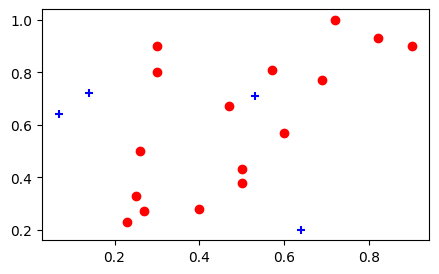

In [19]:
plt.figure(figsize=(5,3), dpi=100)
plt.scatter(x[:, 0], x[:, 1], marker = "o", color = "red")
plt.scatter(w[:, 0], w[:, 1], marker = "+", color = "blue")
plt.show()

In [20]:
# Mesafe, öğrenme oranı ve komşuluk tanımlama
d = np.zeros(w.shape[0], float)
d_n = np.zeros(w.shape[0], float)
alpha = 0.2
theta = np.zeros(w.shape[0], float)
sigma = 1.0  # Komşuluk yarıçapı

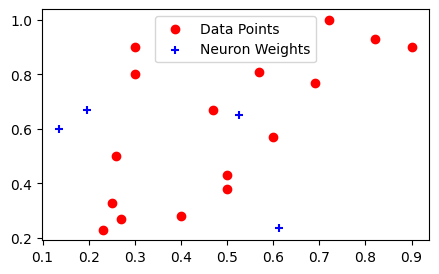

Kazanan Nöron: 2
Ağırlıklar: [[0.19550461 0.66757898]
 [0.13636019 0.59987524]
 [0.612      0.236     ]
 [0.52476347 0.65239815]]



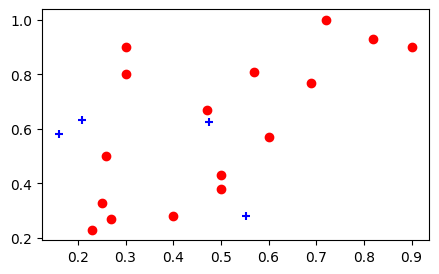

Kazanan Nöron: 1
Ağırlıklar: [[0.20835167 0.63419834]
 [0.16108815 0.57990019]
 [0.55315693 0.2801323 ]
 [0.47572569 0.62417194]]



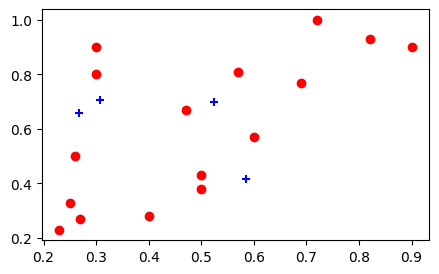

Kazanan Nöron: 3
Ağırlıklar: [[0.30708326 0.70478624]
 [0.26736798 0.65978422]
 [0.58451389 0.41542629]
 [0.52458055 0.69933756]]



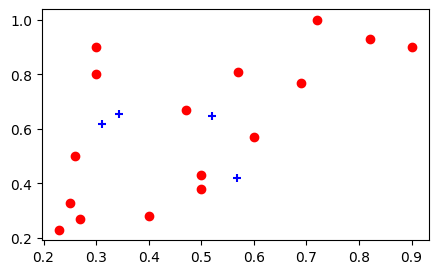

Kazanan Nöron: 2
Ağırlıklar: [[0.34268777 0.65407198]
 [0.31031098 0.61736691]
 [0.56761111 0.41834103]
 [0.51986711 0.64769073]]



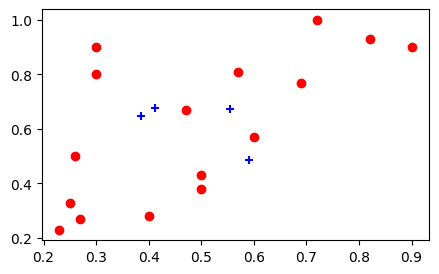

Kazanan Nöron: 3
Ağırlıklar: [[0.41106703 0.67689603]
 [0.38456545 0.64721684]
 [0.59142634 0.48676913]
 [0.55389368 0.67215258]]



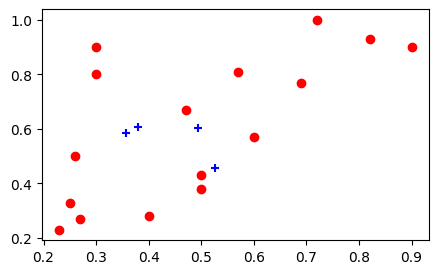

Kazanan Nöron: 1
Ağırlıklar: [[0.37887912 0.60757172]
 [0.35765236 0.58377347]
 [0.5254414  0.45647152]
 [0.49399868 0.60471706]]



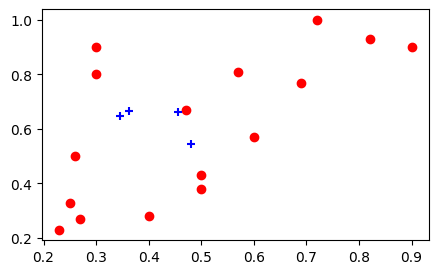

Kazanan Nöron: 0
Ağırlıklar: [[0.36310329 0.66605738]
 [0.34612775 0.64698663]
 [0.4813411  0.54323348]
 [0.45545535 0.66338338]]



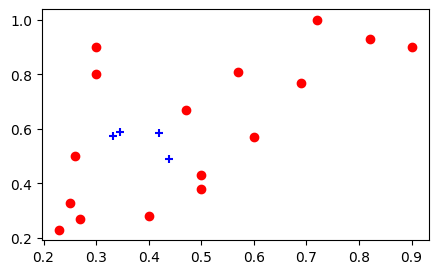

Kazanan Nöron: 2
Ağırlıklar: [[0.34475129 0.58798876]
 [0.33112173 0.57267643]
 [0.43907288 0.48858678]
 [0.41864337 0.58529871]]



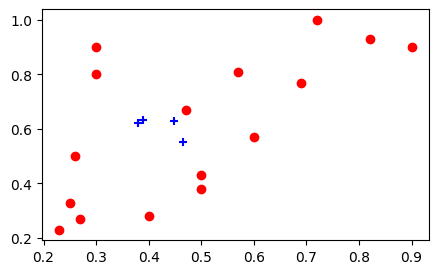

Kazanan Nöron: 3
Ağırlıklar: [[0.38967805 0.63226979]
 [0.37871096 0.61995594]
 [0.4651307  0.55255615]
 [0.4489147  0.63023897]]



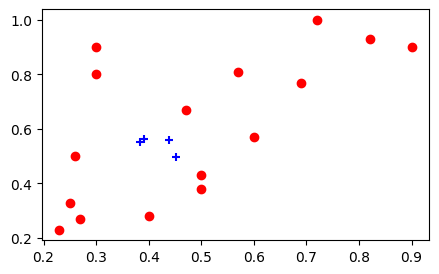

Kazanan Nöron: 2
Ağırlıklar: [[0.39173004 0.56223895]
 [0.38294328 0.55237185]
 [0.45210456 0.49804492]
 [0.43916252 0.56041139]]



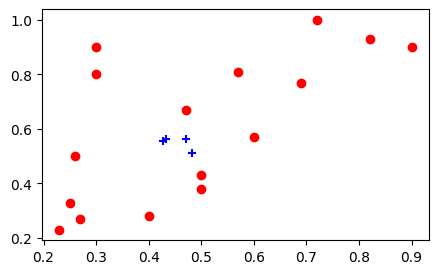

Kazanan Nöron: 3
Ağırlıklar: [[0.43333713 0.56378941]
 [0.42628467 0.5558918 ]
 [0.4816237  0.51240677]
 [0.47133001 0.56232912]]



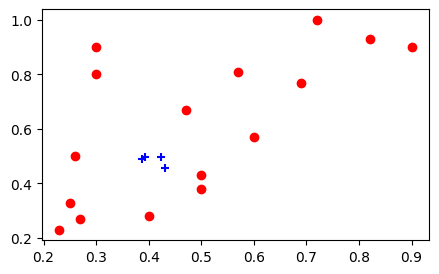

Kazanan Nöron: 2
Ağırlıklar: [[0.39277068 0.49719728]
 [0.38712484 0.49087467]
 [0.43129896 0.45592542]
 [0.42312667 0.49594958]]



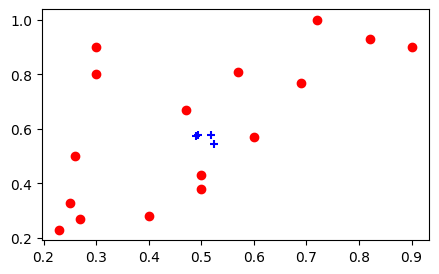

Kazanan Nöron: 3
Ağırlıklar: [[0.49416973 0.57772065]
 [0.4896321  0.57264567]
 [0.52496099 0.54466626]
 [0.51850134 0.57675967]]



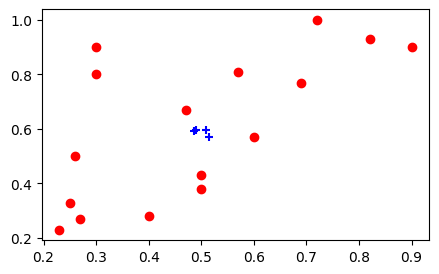

Kazanan Nöron: 0
Ağırlıklar: [[0.48933579 0.59617652]
 [0.48570577 0.59211608]
 [0.51398    0.56970745]
 [0.50880395 0.5954022 ]]



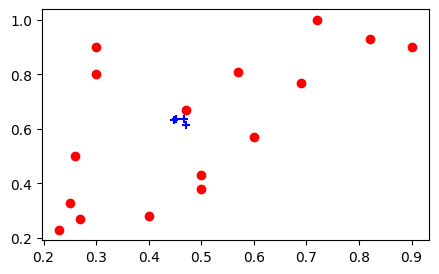

Kazanan Nöron: 0
Ağırlıklar: [[0.45146863 0.63694122]
 [0.44856517 0.63369225]
 [0.47121198 0.61573585]
 [0.46705108 0.636314  ]]



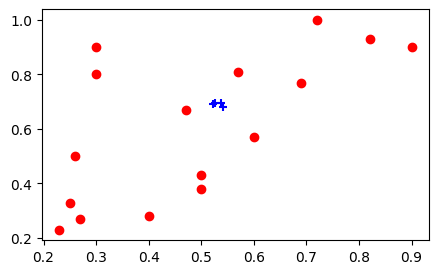

Kazanan Nöron: 3
Ağırlıklar: [[0.52516594 0.69554585]
 [0.52283919 0.69294347]
 [0.54095421 0.67857483]
 [0.53764087 0.6950512 ]]



In [21]:
# Eğitim döngüsü
for i in range(x.shape[0]):
    # Her nöron için BMU'yu bul
    for n in range(w.shape[0]):
        dist = 0
        for j in range(w.shape[1]):
            dist = dist + (x[i, j] - w[n, j])**2
        d[n] = math.sqrt(dist)
    
    # Kazanan nöron
    min_dist = np.min(d)
    win = np.argmin(d)
    
    # Komşuluk mesafeleri ve komşuluk fonksiyonu
    for n in range(w.shape[0]):
        dist = 0
        for j in range(w.shape[1]):
            dist = dist + (w[win, j] - w[n, j])**2
        d_n[n] = math.sqrt(dist)
        
        # Komşuluk fonksiyonu (Gaussian fonksiyonu)
        theta[n] = math.exp(-((d_n[n])**2) / (2 * (sigma**2)))
    
    # Ağırlıkları güncelle (Kazanan nöron daha çok güncellenecek)
    for n in range(w.shape[0]):
        for j in range(w.shape[1]):
            w[n, j] = w[n, j] + (alpha * theta[n] * (x[i, j] - w[n, j]))
    
    # Güncel konumları çiz
    plt.figure(figsize=(5,3), dpi=100)
    plt.scatter(x[:, 0], x[:, 1], marker="o", color="red", label="Data Points" if i == 0 else "")
    plt.scatter(w[:, 0], w[:, 1], marker="+", color="blue", label="Neuron Weights" if i == 0 else "")
    if i == 0:
        plt.legend()
    plt.show()

    print(f"Kazanan Nöron: {win}")
    print("Ağırlıklar:", w)
    print()